In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_low_rank_matrix
from sklearn.datasets import make_blobs # sample data for clustering
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA

In [56]:
# To generate sample data for Regression
X, y = make_regression(n_samples=100, n_features=10)

In [57]:
print(X.shape)
print(y.shape)

(100, 10)
(100,)


In [58]:
df_features = pd.DataFrame(X, columns= ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
df_target = pd.DataFrame(y, columns=['target'])

In [59]:
reg_df = pd.concat([df_features, df_target], axis=1)

In [60]:
reg_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,-0.913168,0.927409,1.415906,-0.822259,1.464733,-1.338005,1.991330,-0.399388,2.100044,1.342076,394.051890
1,-0.674431,1.054641,-0.387112,0.104318,0.993041,0.268246,-0.725284,1.518438,1.514252,0.644414,148.349068
2,-0.044795,-0.383434,0.140073,-0.128181,-2.025158,-0.317908,1.591418,0.143590,-1.092297,-1.026773,-40.759026
3,0.231025,-0.553408,-0.385695,0.011788,-1.244047,-0.607165,1.034472,0.490176,-1.451153,-0.558683,-103.955576
4,1.127745,1.007503,0.559915,-0.815956,0.404320,0.116163,0.220923,-2.370364,0.077747,-0.408616,65.073547


In [61]:
# To generate sample data for classification

In [62]:
X, y = make_classification(n_samples=100, n_classes=2, n_features=10)

In [63]:
print(X.shape)
print(y.shape)

(100, 10)
(100,)


In [64]:
df_features = pd.DataFrame(X, columns= ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
df_target = pd.DataFrame(y, columns=['Target'])

In [65]:
cl_df = pd.concat([df_features, df_target], axis=1)

In [66]:
cl_df.sample(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Target
23,-2.026620,-0.358752,0.015310,-2.003685,0.252852,-2.635484,0.934125,0.615134,-1.437701,0.142010,0
15,-1.776940,1.919003,0.695889,-0.085970,2.284320,-1.836520,-2.346665,1.229582,-1.183572,0.090022,0
12,-1.811194,-1.634538,0.720920,0.088268,0.365835,-2.228433,0.786816,-1.294814,-1.264271,0.117686,0
50,-0.797181,-1.575730,0.359327,-1.144602,0.580876,0.277411,0.027376,-0.854599,-0.352169,-0.039711,0
97,-0.468045,0.559827,-0.056853,0.863555,0.711841,2.010979,0.797358,0.257760,0.093292,-0.157724,1
85,-0.257217,-0.025957,-0.186582,1.839095,0.823546,2.281162,-0.095549,1.451633,0.242208,-0.172208,1
82,2.507956,-2.017396,1.397697,2.181058,0.573114,-0.559795,0.514619,-1.101878,1.158747,0.102171,1
35,-0.315652,-0.413489,1.132358,-1.017091,0.535803,0.265350,-2.107606,1.444493,-0.114197,-0.027034,0
14,-1.468423,0.426380,0.707451,0.144921,-1.582110,-1.695074,-0.143985,-0.084334,-1.006883,0.087295,0
62,1.073761,0.209472,0.082074,0.778967,-0.118991,0.351435,-0.044081,-0.501446,0.592081,0.000754,1


In [67]:
# To generate sample data for dimentiality reduction

In [71]:
def variance_plot(n_samples=100, n_features=10, effective_rank=2, tail_strength=0.5):
    
    X = make_low_rank_matrix(n_samples=n_samples,
                             n_features=n_features,
                             effective_rank=effective_rank,
                             tail_strength=tail_strength)
    
    pca = PCA(n_components=n_features)
    X_reduced = pca.fit_transform(X)
    
    cum_variance= np.cumsum(pca.explained_variance_ratio_)
    print('comulative variance {}'.format(cum_variance))
    
    plt.figure(figsize=(12,10))
    plt.plot(cum_variance)
    plt.xlabel('n_components')
    plt.ylabel('cumulative variance')
    
    return { 'matrix': X, 'pca_model': PCA}

comulative variance [0.53297291 0.87046136 0.9642102  0.98167374 0.98672269 0.98993426
 0.99287004 0.99549062 0.99786827 1.        ]


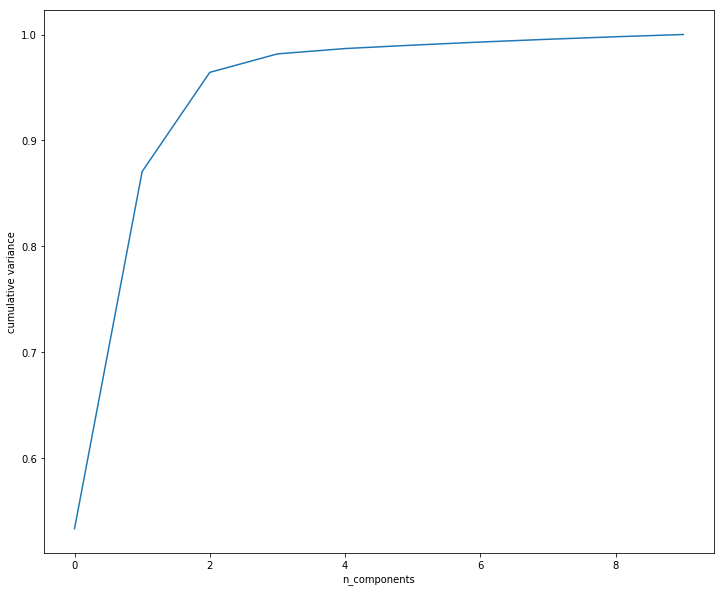

In [75]:
plot = variance_plot(tail_strength=0.1)
plt.show()

comulative variance [0.48078877 0.79658486 0.90532142 0.93697819 0.95229848 0.96345978
 0.97402975 0.98358841 0.99217372 1.        ]


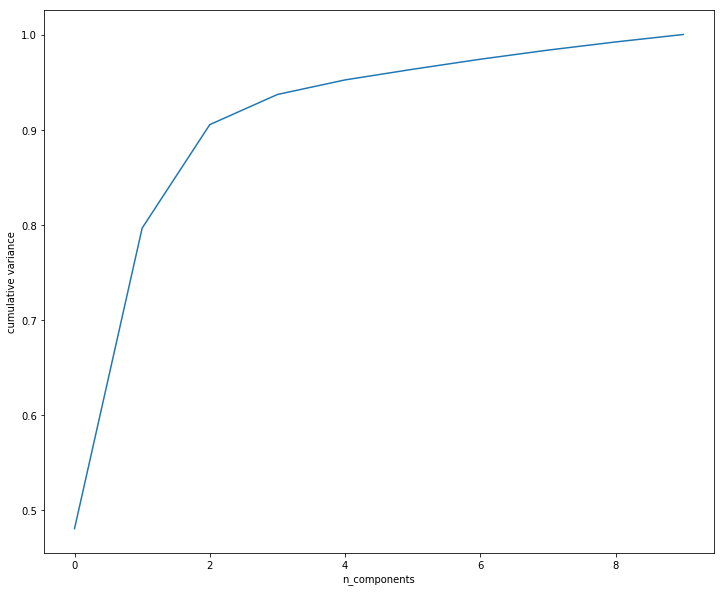

In [78]:
plot_1 = variance_plot(tail_strength=0.2)
plt.show()

comulative variance [0.42443073 0.70905565 0.82766063 0.87500381 0.90363728 0.92659967
 0.94775997 0.96695881 0.98428221 1.        ]


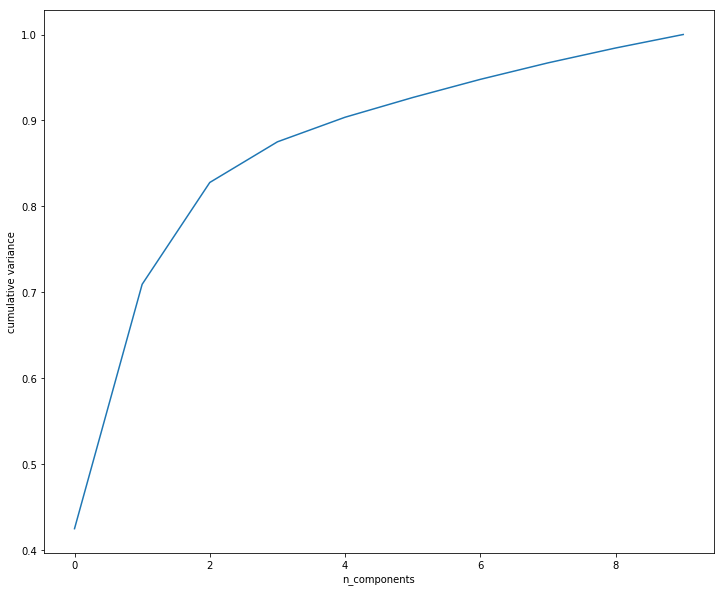

In [79]:
plot_3 = variance_plot(tail_strength=0.3)
plt.show()

In [80]:
# to generate sample data for fitting clustering model

In [85]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5)

In [86]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


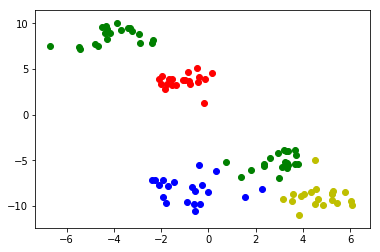

In [88]:
for i in range(len(X)):
    colors = ['r', 'g', 'b', 'y', 'g', 'w']
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]])
plt.show()    

In [91]:
X , color = make_circles(n_samples=200, noise=0.05, factor=0.5)

In [93]:
print(X.shape)
print(color.shape)

(200, 2)
(200,)


In [94]:
color

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0])

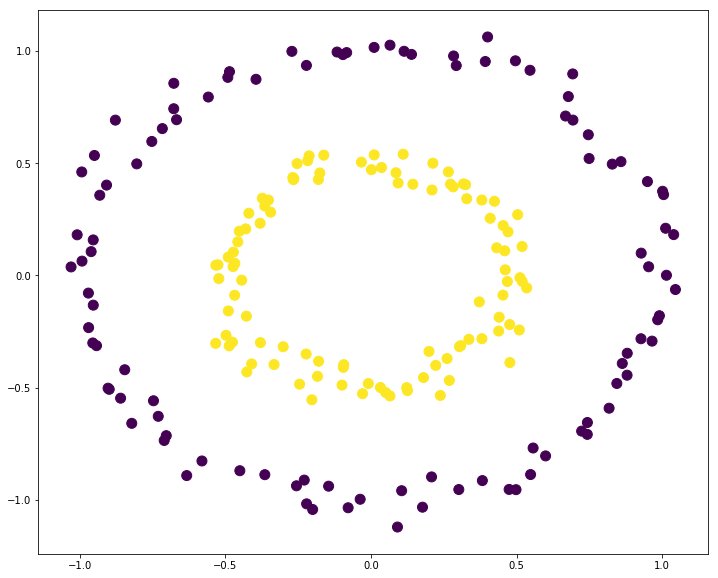

In [96]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], c=color, s=100)
plt.show()